In [0]:
import numpy 
print(numpy.__version__)

1.14.6


In [0]:
import pandas 
print(pandas.__version__)

0.22.0


In [0]:
import matplotlib 
print(matplotlib.__version__)

2.1.2


In [0]:
import quandl 
# version = 3.4.5

In [0]:
!pip install quandl

In [54]:
import fbprophet
print(fbprophet.__version__)

0.3


In [0]:
!pip install fbprophet

In [0]:
def init_api_key():
    quandl.save_key("Your API Key")
    print(quandl.ApiConfig.api_key)
init_api_key()

In [0]:
!cat $HOME/.quandl_apikey

In [0]:
quandl.read_key()
print(quandl.ApiConfig.api_key)

In [55]:
def init_stock(stock_name):
    stock = quandl.get("WIKI/{}".format(stock_name))
    stock = stock.reset_index(level=0)
    return stock
  
stock_name = "BIDU"
baiduStock = init_stock(stock_name)
baiduStock.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2005-08-05,66.00,151.21,60.00,122.54,22681100.0,0.0,1.0,6.600,15.121,6.000,12.254,226811000.0
1,2005-08-08,137.75,153.98,115.24,115.50,15488900.0,0.0,1.0,13.775,15.398,11.524,11.550,154889000.0
2,2005-08-09,120.50,125.30,95.69,96.10,8667700.0,0.0,1.0,12.050,12.530,9.569,9.610,86677000.0
3,2005-08-10,101.00,103.50,88.30,91.75,4963800.0,0.0,1.0,10.100,10.350,8.830,9.175,49638000.0
4,2005-08-11,91.20,100.50,90.60,97.90,7324800.0,0.0,1.0,9.120,10.050,9.060,9.790,73248000.0


In [0]:
print("baiduStock共计{}条。".format(len(baiduStock)))

baiduStock共计3180条。


In [56]:
min_date = min(baiduStock['Date'])
max_date = max(baiduStock['Date'])
print("百度的股票数据从{}到{}。".format(min_date, max_date))

百度的股票数据从2005-08-05 00:00:00到2018-03-27 00:00:00。


In [0]:
print(type(baiduStock))

<class 'pandas.core.frame.DataFrame'>


In [0]:
baiduStock.to_csv("baiduStock.csv", index=False)

In [0]:
!ls

In [0]:
import pandas as pd
baidu_df = pd.read_csv("baiduStock.csv")
baidu_df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2005-08-05,66.00,151.21,60.00,122.54,22681100.0,0.0,1.0,6.600,15.121,6.000,12.254,226811000.0
1,2005-08-08,137.75,153.98,115.24,115.50,15488900.0,0.0,1.0,13.775,15.398,11.524,11.550,154889000.0
2,2005-08-09,120.50,125.30,95.69,96.10,8667700.0,0.0,1.0,12.050,12.530,9.569,9.610,86677000.0
3,2005-08-10,101.00,103.50,88.30,91.75,4963800.0,0.0,1.0,10.100,10.350,8.830,9.175,49638000.0
4,2005-08-11,91.20,100.50,90.60,97.90,7324800.0,0.0,1.0,9.120,10.050,9.060,9.790,73248000.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

def plot_basic_stock_history(df, start_date, end_date, stock_name):
    stats_Ajd_Close = 'Adj. Close'
    stat_min = min(df[stats_Ajd_Close])
    stat_max = max(df[stats_Ajd_Close])
    stat_mean = np.mean(df[stats_Ajd_Close])
    date_stat_min = df[df[stats_Ajd_Close] == stat_min]['Date']
    date_stat_min = date_stat_min[date_stat_min.index[0]].date()
    date_stat_max = df[df[stats_Ajd_Close] == stat_max]['Date']
    date_stat_max = date_stat_max[date_stat_max.index[0]].date()
    print("{}在{}最小，价格是：{}美元。".format(stats_Ajd_Close, date_stat_min, stat_min))
    print("{}在{}最高，价格是：{}美元。".format(stats_Ajd_Close, date_stat_max, stat_max))
    print("{}在{}当前价格是：{}美元。".format(stats_Ajd_Close, end_date.date(), df.loc[df.index[-1], 'Adj. Close']))
    plt.style.use("default")
    plt.plot(df["Date"], 
             df[stats_Ajd_Close], 
             color='r', 
             linewidth=3, 
             label=stats_Ajd_Close)
    plt.xlabel("Date")
    plt.ylabel("US $")
    plt.title("{} Stock History".format(stock_name))
    plt.grid()
    plt.show()

Adj. Close在2006-02-07最小，价格是：4.515美元。
Adj. Close在2017-10-16最高，价格是：272.82美元。
Adj. Close在2018-03-27当前价格是：230.96美元。


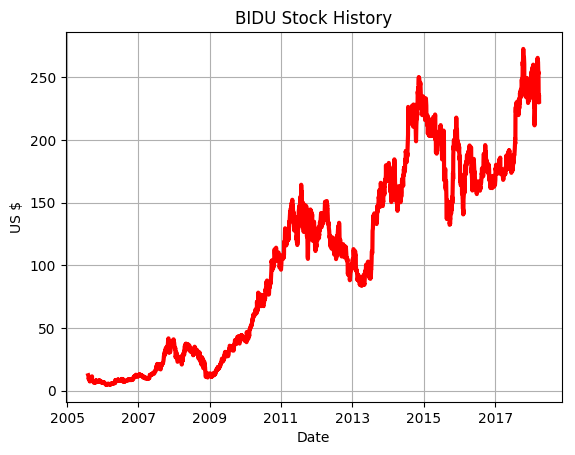

In [0]:
start_date = min_date
end_date = max_date
plot_basic_stock_history(baiduStock, start_date, end_date, stock_name)

In [0]:
import pandas as pd
def plot_potential_profit(df, 
                          start_date, 
                          end_date, 
                          stock_name, 
                          line_color, 
                          text_color, 
                          myshares=1):
    start_price = float(df[df["Date"] == start_date]["Adj. Open"])
    end_price = float(df[df["Date"] == end_date]["Adj. Close"])
    df["profits"] = (df["Adj. Close"] - start_price) * myshares
    total_hold_profit = (end_price - start_price) * myshares
    print("从{}到{}，购买{}股，总收益是：{}美元。".format(start_date.date(), 
                                                  end_date.date(), 
                                                  myshares, 
                                                  total_hold_profit))
    plt.style.use("default")
    plt.plot(df["Date"], df["profits"], color=line_color, linewidth=3)
    plt.xlabel("Date")
    plt.ylabel("Profit $")
    plt.title("My Shares From {} to {} on {}.".format(start_date.date(), end_date.date(), stock_name))
    text_location_x = (end_date - pd.DateOffset(months=1)).date()
    text_location_y = total_hold_profit + (total_hold_profit / 40)
    plt.text(text_location_x, 
             text_location_y, 
             "${}".format(int(total_hold_profit)), 
             color=text_color,
             size=15)
    plt.grid()
    plt.show()

从2005-08-05到2018-03-27，购买100股，总收益是：22436.0美元。


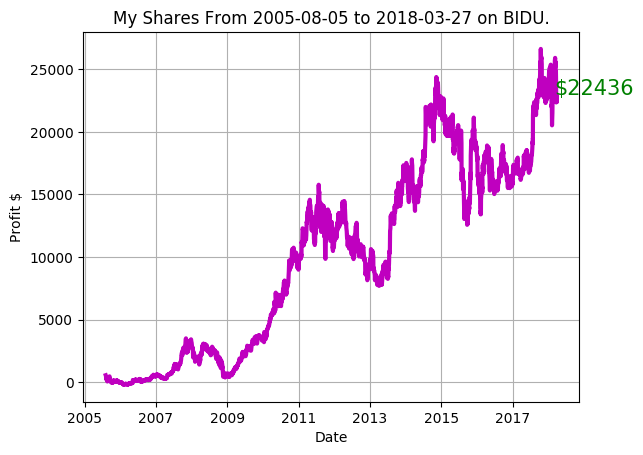

In [0]:
start_date = min_date
end_date = max_date
plot_potential_profit(baiduStock, start_date, end_date, stock_name, 'm', 'g', 100)

从2012-08-07到2013-03-05，购买100股，总收益是：-3853.999999999999美元。


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


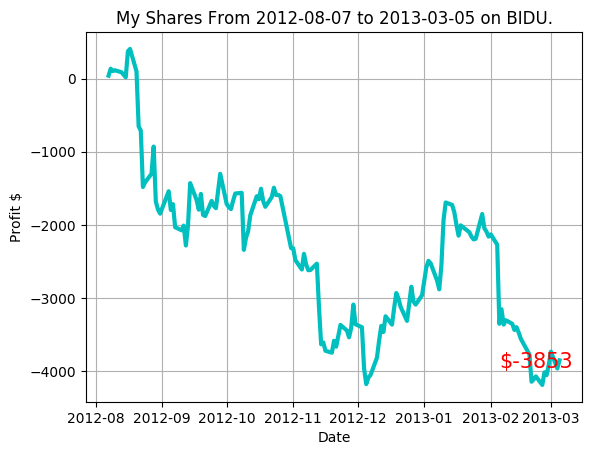

In [0]:
# 倘若在2012年到2013年之间持股的话，差不多就会亏损一半哦，可是谁又知道了？他们最后涨了那么多
start_date = pd.to_datetime("2012-08-07")
end_date = pd.to_datetime("2013-03-05")
baiduStockLowerPricePhase = baiduStock[
                            (baiduStock['Date'] >= start_date.date()) & 
                            (baiduStock['Date'] <= end_date.date())
                            ]
plot_potential_profit(baiduStockLowerPricePhase, start_date, end_date, stock_name, 'c', 'r', 100)

In [0]:
def train_model(stock_history, days=0, weekly_seasonality=False, monthly_seasonality=False):
    model = fbprophet.Prophet(daily_seasonality=False,  
                              weekly_seasonality=False, 
                              yearly_seasonality=True,
                              changepoint_prior_scale=0.05)
    if monthly_seasonality:
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(stock_history)
    future = model.make_future_dataframe(periods=days)
    future = model.predict(future)
    return model, future
  
  
def create_prophet_model(df, 
                         stock_name, 
                         days=0,
                         weekly_seasonality=False, 
                         monthly_seasonality=False):
    stock_history = df[df["Date"] > (max_date - pd.DateOffset(years=3)).date()]
    model, future = train_model(stock_history, days, weekly_seasonality, monthly_seasonality)

    plt.style.use("default") 
    fig, ax = plt.subplots(1, 1) 
    fig.set_size_inches(10, 5)
    # 绘制真实的值
    ax.plot(stock_history['ds'], 
            stock_history['y'], 
            'v-', 
            linewidth=1.0, 
            alpha=0.8, 
            ms=1.8, 
            label='Observations')
    # 绘制预测的值
    ax.plot(future['ds'], 
            future['yhat'], 
            'o-',
            linewidth=1., 
            label='Modeled')
    # 使用带状绘制一个不确定的区间值
    ax.fill_between(future['ds'].dt.to_pydatetime(), 
                    future['yhat_upper'], 
                    future['yhat_lower'], 
                    alpha=0.3, 
                    facecolor='g', 
                    edgecolor='k', 
                    linewidth=1.0, 
                    label='Confidence Interval') 
    plt.legend(loc=2, prop={'size': 10})  
    plt.title("{} Historical and Modeled Stock Price".format(stock_name)) 
    plt.xlabel('Date') 
    plt.ylabel('Price $') 
    plt.grid(linewidth=0.6, alpha=0.6) 
    plt.show() 
    return model, future
  

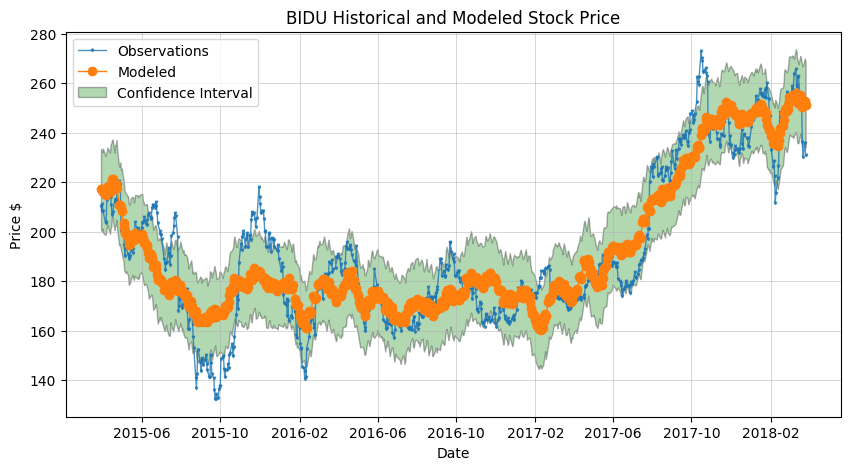

In [0]:
baiduStock["ds"] = baiduStock['Date']
baiduStock["y"] = baiduStock['Adj. Close']
model, future_data = create_prophet_model(baiduStock, stock_name, monthly_seasonality=True)

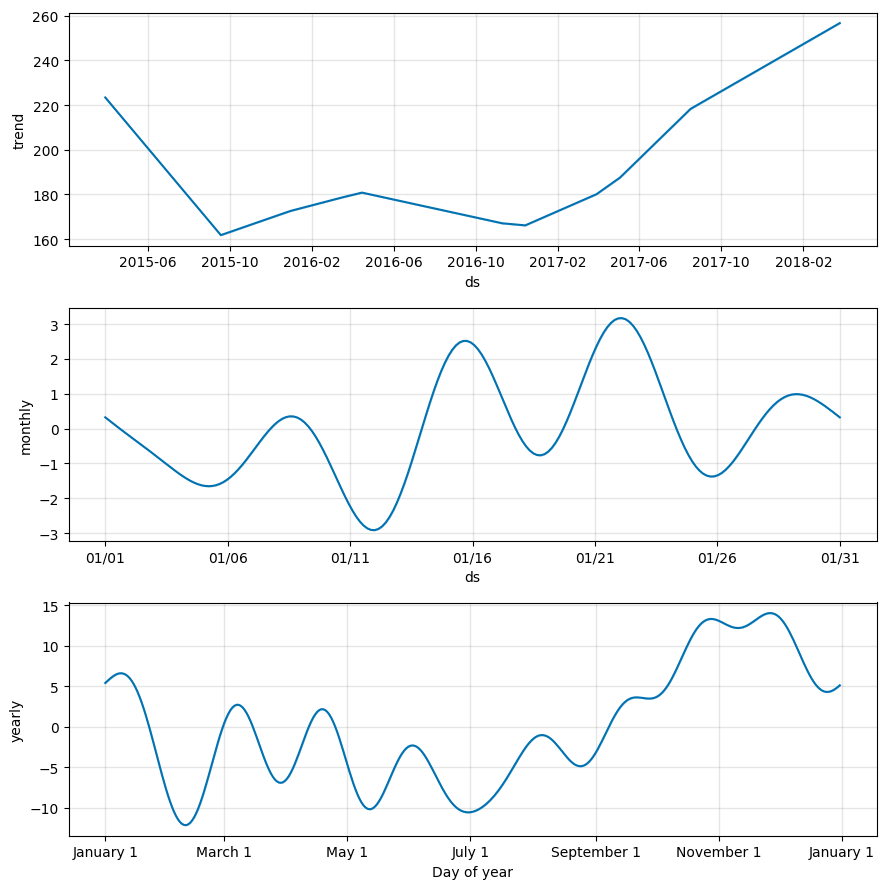

In [0]:
model.plot_components(future_data)
plt.show()

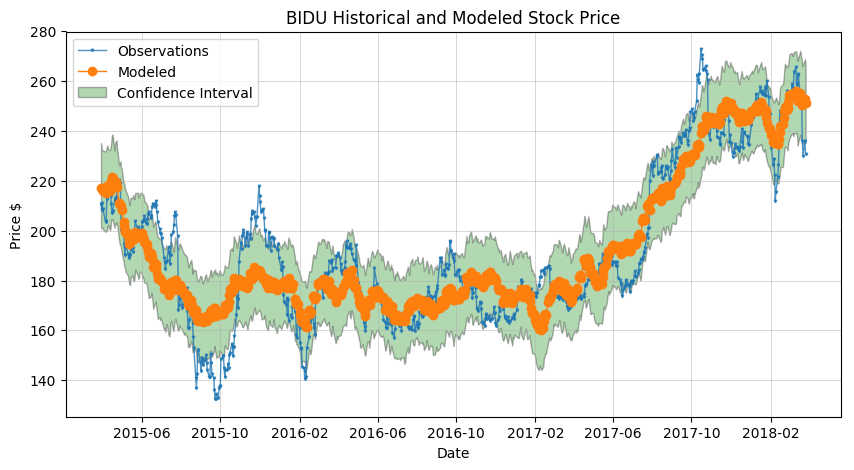

In [0]:
model, future_data = create_prophet_model(baiduStock, stock_name, weekly_seasonality=True, monthly_seasonality=True)

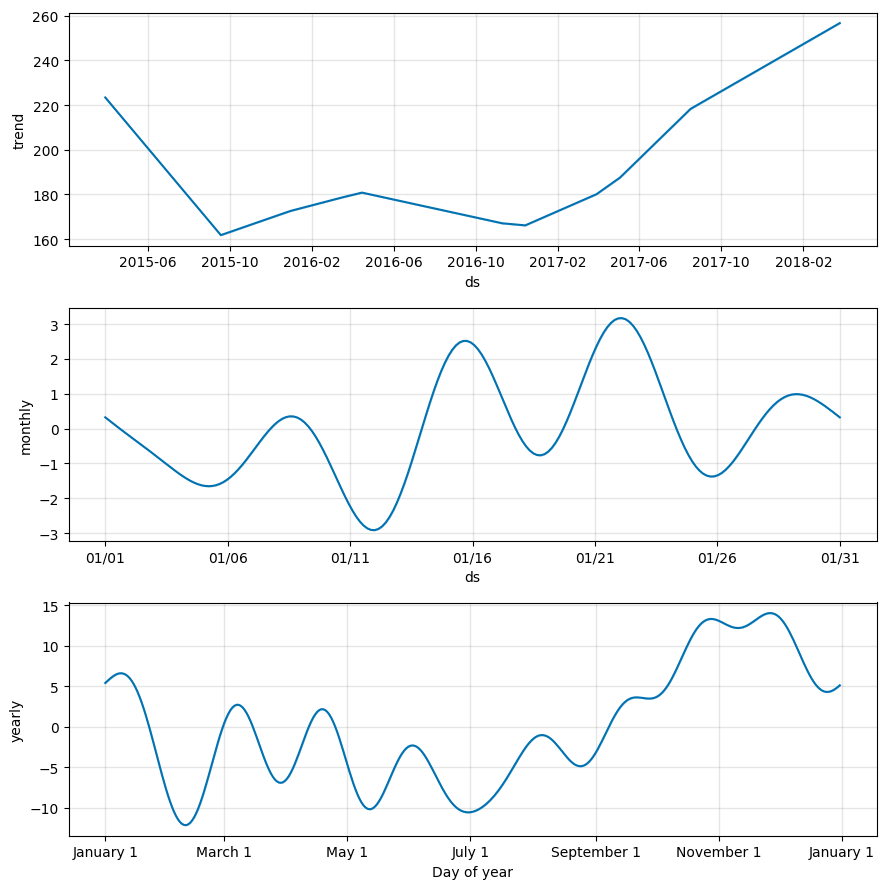

In [0]:
model.plot_components(future_data)
plt.show()

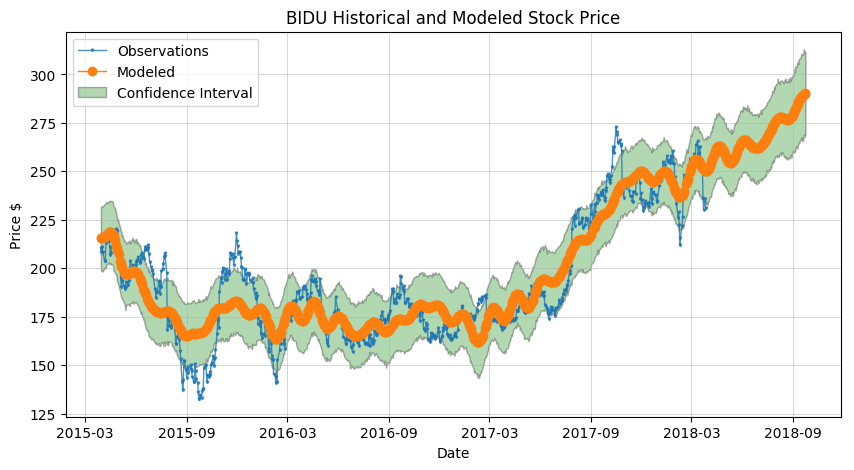

In [0]:
model, future = create_prophet_model(baiduStock, stock_name, days=180)

/content/prophet_evaluator.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


BIDU的股票从2017-03-27到2018-03-27，购买1000股。
当模型预测到上涨时，股价在此时间点上涨56.69291338582677%。
当模型预测到下跌时，股价在此时间点下跌49.586776859504134%。
使用Prophet模型预测整个收益是：$38780.00000000006。
买入并持有的利润：$61150.00000000001。


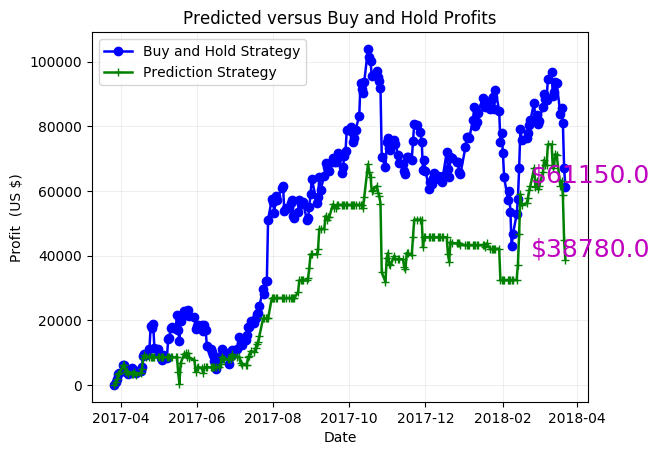

In [0]:
import prophet_evaluator
baiduStock["ds"] = baiduStock['Date']
baiduStock["y"] = baiduStock['Adj. Close']
prophet_evaluator.evaluator(baiduStock, min_date, max_date, train_model, stock_name, 1000)

# 微软的股票分析

In [0]:
stock_name = "MSFT"
microsoftStock = init_stock(stock_name)
microsoftStock.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


In [0]:
print("Microsoft Stock共计{}条。".format(len(microsoftStock)))

Microsoft Stock共计8076条。


In [0]:
min_date = min(microsoftStock['Date'])
max_date = max(microsoftStock['Date'])
print("微软的股票数据从{}到{}。".format(min_date, max_date))

微软的股票数据从1986-03-13 00:00:00到2018-03-27 00:00:00。


In [0]:
microsoftStock.to_csv("microsoftStock.csv", index=False)

In [0]:
!ls

baiduStock.csv	    prophet_evaluator.py  sample_data
microsoftStock.csv  __pycache__


In [0]:
import pandas as pd

microsoftStock = pd.read_csv("microsoftStock.csv")
microsoftStock.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


Adj. Close在1986-03-24最小，价格是：0.060097123934714美元。
Adj. Close在2018-03-12最高，价格是：96.77美元。
Adj. Close在2018-03-27当前价格是：89.47美元。


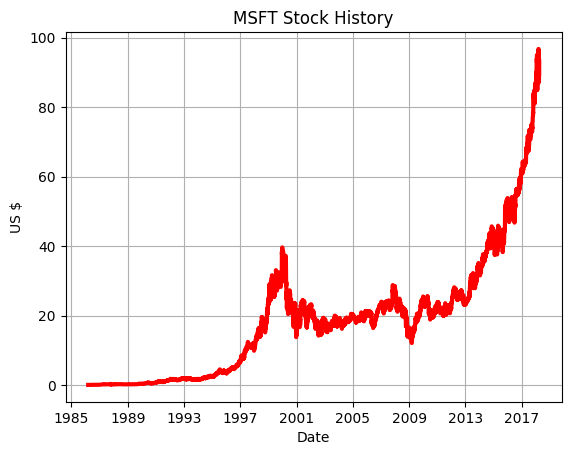

In [0]:
microsoftStock["Date"] = pd.to_datetime(microsoftStock["Date"])

start_date = min_date
end_date = max_date
plot_basic_stock_history(microsoftStock, start_date, end_date, stock_name)

从1986-03-13到2018-03-27，购买100股，总收益是：8941.105858998711美元。


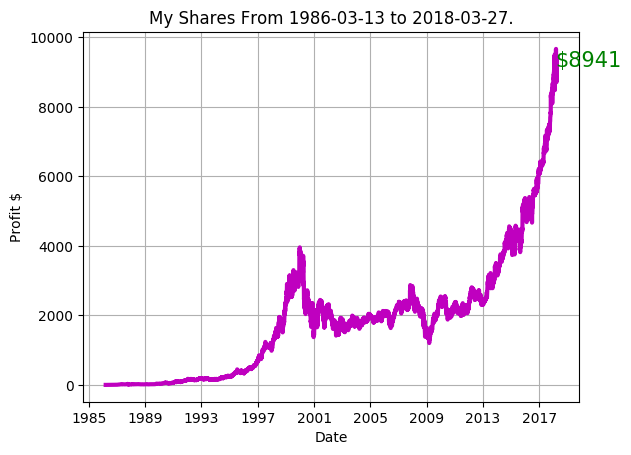

In [0]:
start_date = min_date
end_date = max_date
plot_potential_profit(microsoftStock, start_date, end_date, stock_name, 'm', 'g', 100)

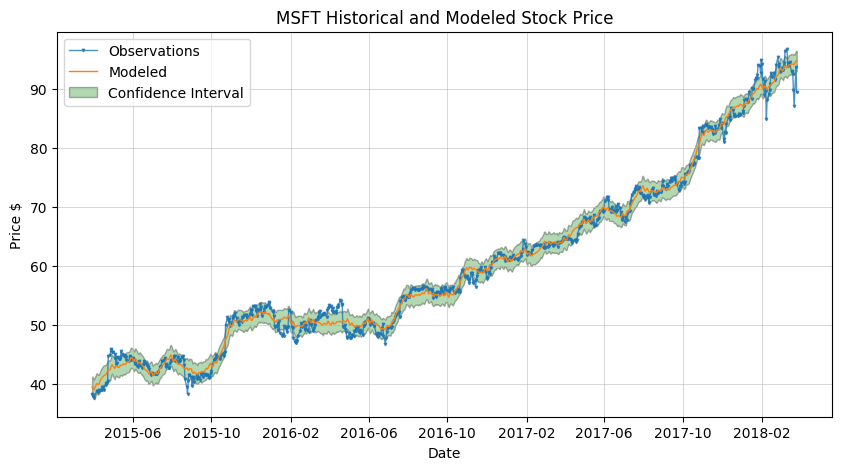

In [0]:
microsoftStock["ds"] = microsoftStock['Date']
microsoftStock["y"] = microsoftStock['Adj. Close']
# 将create_prophet_model()函数里的第二个plot()方法里的绘图线条样式o-修改成-，以便于绘出的图更好看些
model, future_data = create_prophet_model(microsoftStock, stock_name, monthly_seasonality=True)

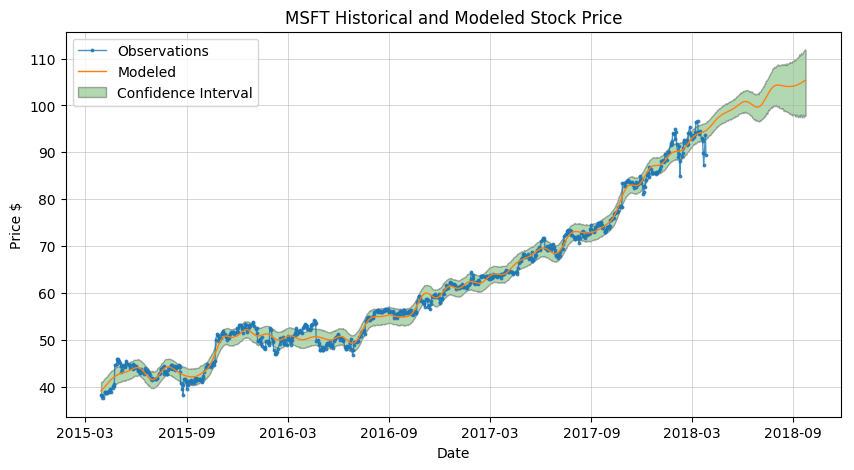

In [0]:
model, future = create_prophet_model(microsoftStock, stock_name, days=180)

/content/prophet_evaluator.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


MSFT的股票从2017-03-27到2018-03-27，购买1000股。
当模型预测到上涨时，股价在此时间点上涨55.932203389830505%。
当模型预测到下跌时，股价在此时间点下跌41.66666666666667%。
使用Prophet模型预测整个收益是：$12827.423107539924。
买入并持有的利润：$23111.007152734004。


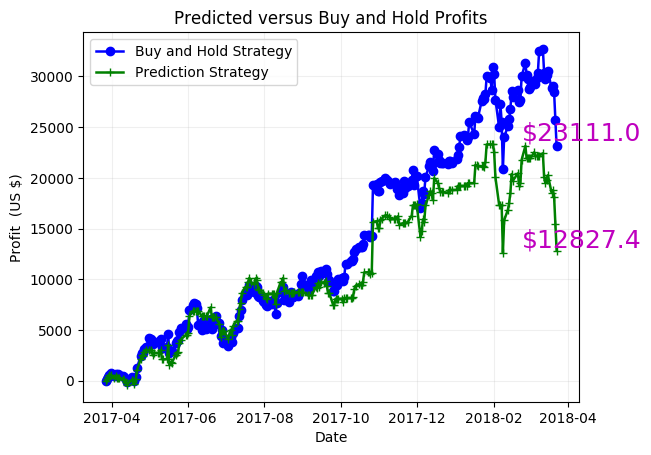

In [0]:
start_date = min_date
end_date = max_date
prophet_evaluator.evaluator(microsoftStock, start_date, end_date, train_model, stock_name, 1000)